In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json
plt.style.use('ggplot')

In [32]:
with open('data/countries.json', 'r') as f:
    countries = json.load(f)

with open('data/initial_network.np', 'rb') as f:
    initial_network = np.load(f)

with open('data/temporal_network.np', 'rb') as f:
    temporal_network = np.load(f)

# Analysis of initial network

In [3]:
print(f"Network out-degree mean: {initial_network.sum(axis = 0).mean()}")
print("Obs.: out-degree is the number of travels out of the country")
print(f"Network in-degree mean: {initial_network.sum(axis = 1).mean()}")
print("Obs.: in-degree is the number of travels to the country")

Network out-degree mean: 20.25777777777778
Obs.: out-degree is the number of travels out of the country
Network in-degree mean: 20.25777777777778
Obs.: in-degree is the number of travels to the country


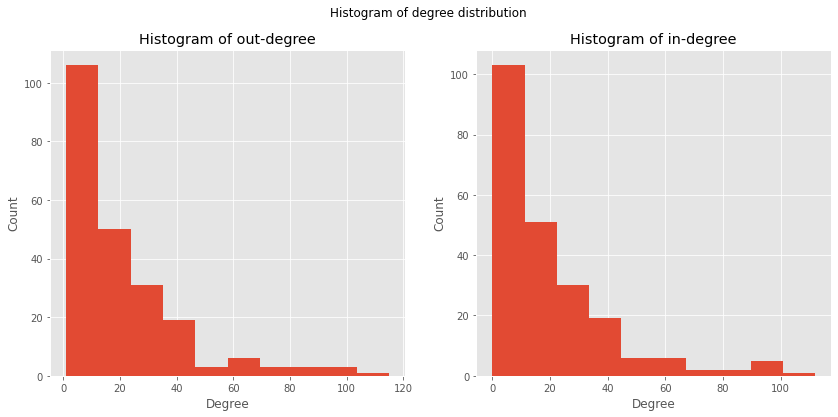

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].hist([x[1] for x in countries_degree_out])
ax[0].set_title("Histogram of out-degree")
ax[1].hist([x[1] for x in countries_degree_in])
ax[1].set_title("Histogram of in-degree")

for i in range(2):
    ax[i].set_xlabel("Degree")
    ax[i].set_ylabel("Count")

plt.suptitle("Histogram of degree distribution")
plt.show()

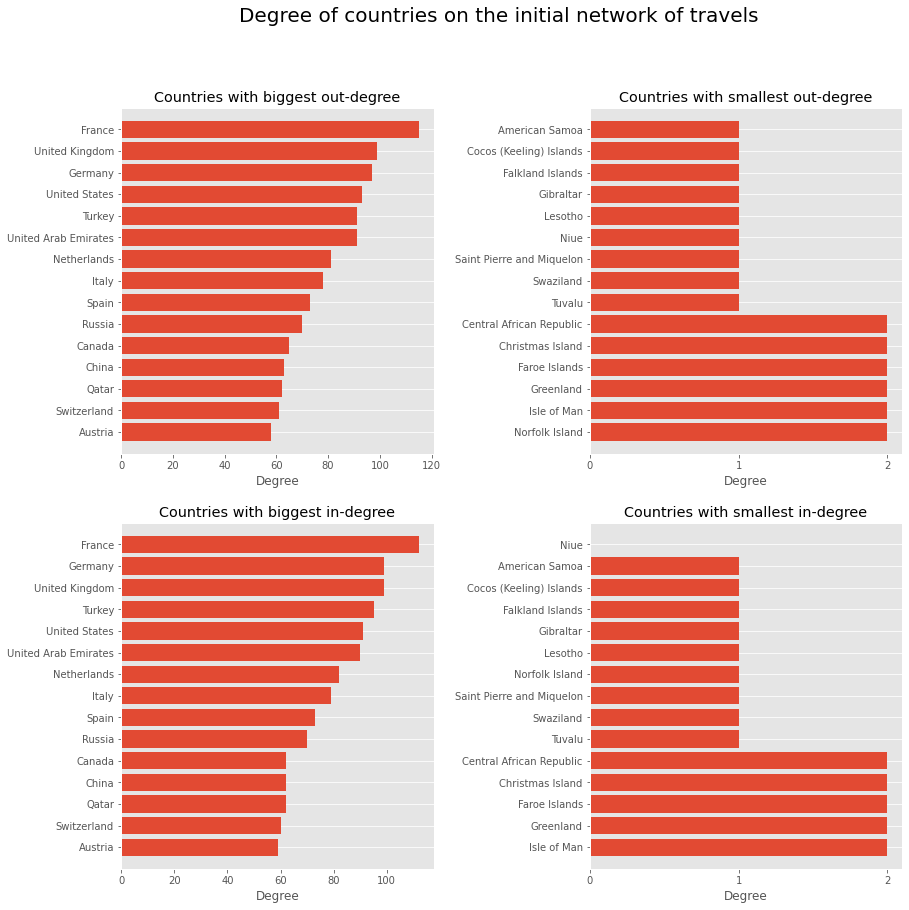

In [4]:
countries_degree_out = list(zip(countries, initial_network.sum(axis = 0)))
countries_degree_in = list(zip(countries, initial_network.sum(axis = 1)))


n = 15
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,14))
plt.subplots_adjust(wspace = 0.5)
for i in range(2):
    for j in range(2):
        ax[i, j].grid(axis = 'x')
        ax[i, j].set_xlabel("Degree")
        ax[i, j].set_ylim((15, -1)) 
        ax[i, j].set_yticks(list(range(n)))
        
countries_degree_out.sort(key = lambda x : x[1], reverse = True)

ax[0, 0].set_title("Countries with biggest out-degree")
ax[0, 0].barh(list(range(n)), [countries_degree_out[i][1] for i in range(n)])
ax[0, 0].set_yticklabels([countries_degree_out[i][0] for i in range(n)])

countries_degree_out.sort(key = lambda x : x[1])

ax[0, 1].set_title("Countries with smallest out-degree")
ax[0, 1].barh(list(range(n)), [countries_degree_out[i][1] for i in range(n)])
ax[0, 1].set_xticks([0, 1, 2])
ax[0, 1].set_yticklabels([countries_degree_out[i][0] for i in range(n)])


countries_degree_in.sort(key = lambda x : x[1], reverse = True)

ax[1, 0].set_title("Countries with biggest in-degree")
ax[1, 0].barh(list(range(n)), [countries_degree_in[i][1] for i in range(n)])
ax[1, 0].set_yticklabels([countries_degree_in[i][0] for i in range(n)])

countries_degree_in.sort(key = lambda x : x[1])

ax[1, 1].set_title("Countries with smallest in-degree")
ax[1, 1].barh(list(range(n)), [countries_degree_in[i][1] for i in range(n)])
ax[1, 1].set_xticks([0, 1, 2])
ax[1, 1].set_yticklabels([countries_degree_in[i][0] for i in range(n)])

plt.suptitle("Degree of countries on the initial network of travels", size = 20)
plt.show()

# Analysis of network evolution

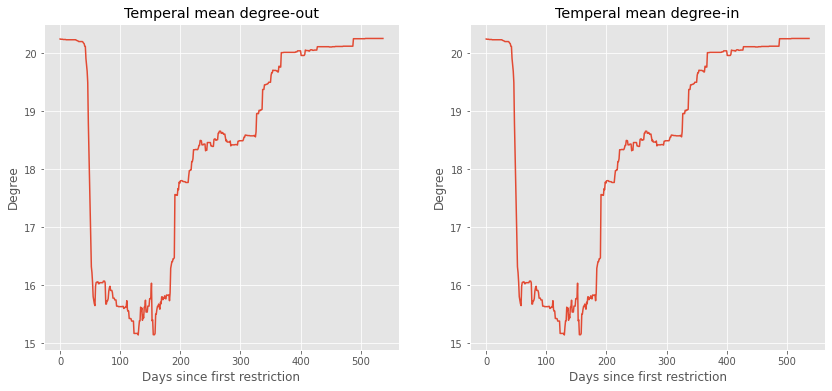

In [33]:
countries_temporal_degree_out_mean = temporal_network.sum(axis = 1).mean(axis = 1)
countries_temporal_degree_in_mean = temporal_network.sum(axis = 2).mean(axis = 1)
n_days = temporal_network.shape[0]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].plot(list(range(n_days)), countries_temporal_degree_out_mean)
ax[0].set_title("Temperal mean degree-out")
ax[1].plot(list(range(n_days)), countries_temporal_degree_in_mean)
ax[1].set_title("Temperal mean degree-in")

for i in range(2):
    ax[i].set_xlabel("Days since first restriction")
    ax[i].set_ylabel("Degree")
plt.show()